Laboratorio

Estudiante: Jean Marco Bello Colque

Parte 1

Con las imágenes contenidas en la carpeta procésalas de manera que obtengan el 
siguiente resultado 

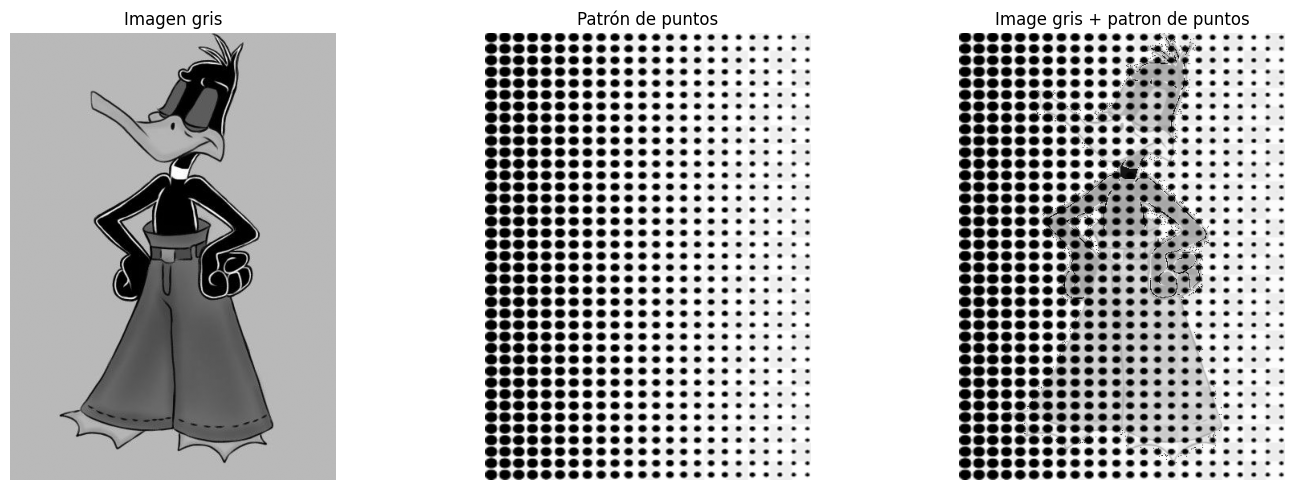

In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

puntos = cv2.imread("puntos.png", cv2.IMREAD_GRAYSCALE)
pato = cv2.imread("pato.jpg")

puntos = cv2.resize(puntos, (pato.shape[1], pato.shape[0]))
pato_gray = cv2.cvtColor(pato, cv2.COLOR_BGR2GRAY)
pato_gray_color = cv2.merge([pato_gray]*3)

mascara = puntos / 255.0
mascara = np.expand_dims(mascara, axis=2)

pato_difuminado = pato_gray_color * 0.4 + 255 * 0.7
pato_difuminado = pato_difuminado.astype(np.uint8)

resultado = (pato_difuminado * mascara).astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(pato_gray, cmap="gray")
plt.title("Imagen gris")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(puntos, cmap="gray")
plt.title("Patrón de puntos")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(resultado, cmap="gray")
plt.title("Image gris + patron de puntos")
plt.axis("off")

plt.tight_layout()
plt.show()


Parte 2

Cuenta cuantos objetos de cada color se encuentran en la imagen 

Manual

Rojo: 7 objetos
Naranja: 7 objetos
Amarillo: 8 objetos
Verde: 11 objetos
Azul: 15 objetos


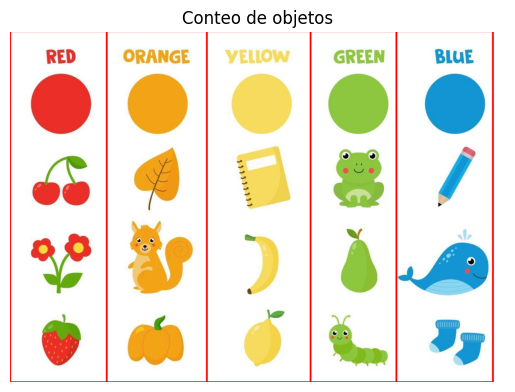

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

imagen = cv2.imread("colores.jpg")
h, w, _ = imagen.shape

sectores = [
    ("Rojo",     0,   270),
    ("Naranja",  270, 550),
    ("Amarillo", 550, 840),
    ("Verde",    840, 1080),
    ("Azul",     1080, 1350)
]

img_bordeada = imagen.copy()

for nombre, x1, x2 in sectores:
    sector = imagen[:, x1:x2]
    hsv = cv2.cvtColor(sector, cv2.COLOR_BGR2HSV)
    _, bin = cv2.threshold(hsv[:, :, 1], 60, 255, cv2.THRESH_BINARY)
    etiquetas = measure.label(bin, connectivity=2, background=0)
    cantidad = etiquetas.max()
    print(f"{nombre}: {cantidad} objetos")

    cv2.rectangle(img_bordeada, (x1, 0), (x2, h), (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(img_bordeada, cv2.COLOR_BGR2RGB))
plt.title("Conteo de objetos")
plt.axis("off")
plt.show()


Automatico

Rojo: 7 objetos
Naranja: 7 objetos
Amarillo: 8 objetos
Verde: 12 objetos
Azul: 15 objetos


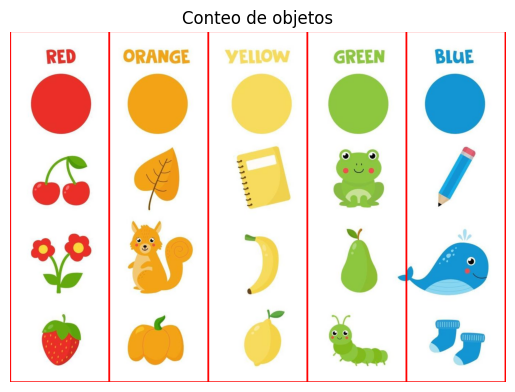

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

imagen = cv2.imread("colores.jpg")
h, w, _ = imagen.shape
quinto = w // 5

sectores = [
    ("Rojo",     imagen[:, 0:quinto]),
    ("Naranja",  imagen[:, quinto:2*quinto]),
    ("Amarillo", imagen[:, 2*quinto:3*quinto]),
    ("Verde",    imagen[:, 3*quinto:4*quinto]),
    ("Azul",     imagen[:, 4*quinto:w])
]

img_bordeada = imagen.copy()

for i, (nombre, sector) in enumerate(sectores):
    hsv = cv2.cvtColor(sector, cv2.COLOR_BGR2HSV)
    _, bin = cv2.threshold(hsv[:, :, 1], 60, 255, cv2.THRESH_BINARY)
    etiquetas = measure.label(bin, connectivity=2, background=0)
    cantidad = etiquetas.max()
    print(f"{nombre}: {cantidad} objetos")
    cv2.rectangle(img_bordeada, (i * quinto, 0), ((i + 1) * quinto, h), (0, 0, 255), 3)

plt.imshow(cv2.cvtColor(img_bordeada, cv2.COLOR_BGR2RGB))
plt.title("Conteo de objetos")
plt.axis("off")
plt.show()


Parte 3

Estás trabajando en un proyecto de reconocimiento de rostros y necesitas detectar los 
bordes de las caras en las imágenes. Explique cómo aplicaría el operador de detección de 
bordes de Canny y aplícalo con un código en Python en jupyter

Etapas del operador de Canny:

Suavizado con filtro Gaussiano para eliminar ruido.

Cálculo del gradiente de intensidad para encontrar bordes.

Supresión no máxima para afinar los bordes.

Umbralización con histéresis para conectar bordes fuertes y débiles.

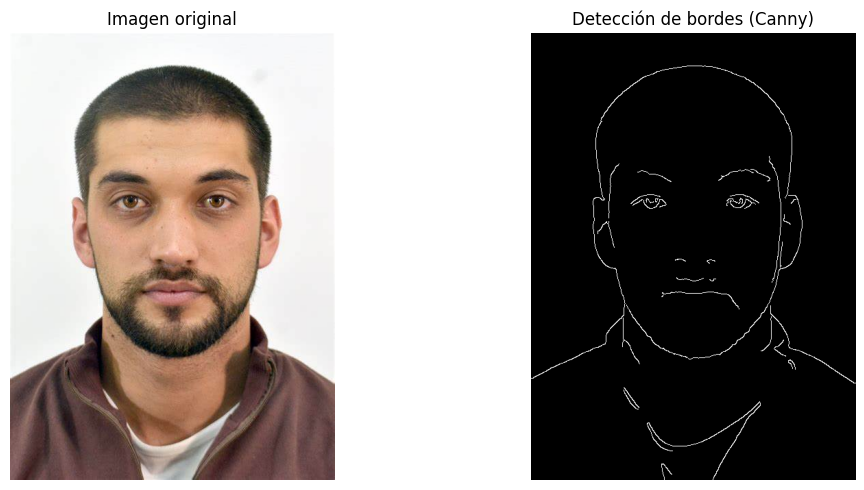

In [ ]:
import cv2
import matplotlib.pyplot as plt

imagen = cv2.imread("rostro.jpg")
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
imagen_suavizada = cv2.GaussianBlur(imagen_gris, (5, 5), sigmaX=1.4)
bordes_canny = cv2.Canny(imagen_suavizada, threshold1=100, threshold2=200)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(bordes_canny, cmap="gray")
plt.title("Detección de bordes (Canny)")
plt.axis("off")

plt.tight_layout()
plt.show()
